# Solving Linear Systems: 2 variables



In [1]:
import numpy as np

## 1 - Representing and solving system of linear equations using Matrices
### 1.1 - System of linear equation
A __system of linear equations (or linear system)__ is a collection of one or more linear equations involving the same variables.
__To solve__ a system of linear equations means to find such values of the variables x1, x2 that all of its equations are simultaneously satisfied.
A linear system is __inconsistent__ if it has no solution, and otherwise it is said to be consistent. Consistent system can have one or infinite number of solutions.

### 1.2 - Solving system of linear equations using matrices
`NumPy` linear algebra package provides quick and reliable way to solve the system of linear equations using function `np.linalg.solve(A, b)`.
Here __A__ is a matrix, each row of which represents one equation in the system and each column corresponds to the variable x1, x2. And __b__ is a 1-D array of the free (right side coefficients.

\begin{cases}
    -x_1 + 3x_2 = 7, \\
    3x_1 + 2x_2 = 1,
\end{cases}


In [2]:
#Form matrix and array of free coefficients
A = np.array([[-1, 3], [3, 2]], dtype=float)
b = np.array([7, 1], dtype=float)

print("Matrix A: \n", A)
print("\nArray b: \n", b)

Matrix A: 
 [[-1.  3.]
 [ 3.  2.]]

Array b: 
 [7. 1.]


In [3]:
# Print shapes
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}")

Shape of A: (2, 2)
Shape of b: (2,)


In [4]:
# Solve the system
x = np.linalg.solve(A, b)
print(f"Solution: {x}")

Solution: [-1.  2.]


### 1.3 - Evaluating determinant of a matrix
Matrix __A__ is a __square matrix__. In case of square matrix it is possible to calculate its determinant - a real number which characterizes some properties of matrix.
Linear system containing two (or more) equations with the same number of unknown variables will have one solution if and only if matrix __A__ has non-zero determinant.



In [5]:
d = np.linalg.det(A)
print(f"Determinant of matrix A: {d:.2f}")

Determinant of matrix A: -11.00


## 2. - Solving system of linear equations using elimination method
### 2.1 - Elimination method
In the elimination method you either add or subtract the equations of the linear system to get an equation with smaller number of variables. If needed, you can also multiply a whole equation by non-zero number.

\begin{cases}
    -x_1 + 3x_2 = 7, \\
    3x_1 + 2x_2 = 1,
\end{cases}

Multiply first equation by 3, add it to the second equation and exchange the second equation with the result of this addition:


\begin{cases}
    -x_1 + 3x_2 = 7, \\
    11x_2 = 22.
\end{cases}

The variable x1 was eliminated from the second equation and brought to the form where, dividing my 11, you can see the solution value for x2: x2 = 2. Now take x2 = 2 in the first equation:

\begin{cases}
    -x_1 + 3 \times 2 = 7, \\
    x_2 = 2,
\end{cases}

And find the solution:

\begin{cases}
    x_1 = -1, \\
    x_2 = 2.
\end{cases}







### 2.2 - Preparation for the implementation of elimination method in the code
Representing the system in a matrix form as

\begin{array}{rrr}
-1 & 3 & 7 \\
3 & 2 & 1
\end{array}



you can apply the same operations to the rows of the matrix with Python code.
Unify matrix A and array b into one matrix using `np.hstack` function.
Note that the shape of the originally defined array b was (2,), to stack it with the (2, 2) matrix you need to use `.reshape((2,1))` function:


In [6]:
A_system = np.hstack((A, b.reshape(2, 1)))
print(A_system)
print(A_system[1])

[[-1.  3.  7.]
 [ 3.  2.  1.]]
[3. 2. 1.]


### 2.3 - Implementation of elimination method
Let's apply some operations to the matrix *A_system* to eliminate variable.
1. Copy the matrix to keep the original one without any changes.
2. Multiply first row by 3.
3. Add it to the second row.
4. Exchange the second row with the result of this addition.



In [7]:
# Function .copy() is used to keep the original matrix without any changes.
A_system_copy = A_system.copy()
A_system_copy[1] = 3 * A_system_copy[0] + A_system_copy[1]
A_system_copy[1] = 1/11 * A_system_copy[1]
print(A_system_copy)

[[-1.  3.  7.]
 [ 0.  1.  2.]]


The original matrix `A_system` was constructed stacking horizontally matrix __A__ and array __b__. You can read the last row as 0x1 + 1x2 = 2, thus x2 = 2.
And the first row as -1x1 + 3x2 = 7. Substitute x2 = 2, you will get x1 = -1.


### 2.4 - Graphical representation of the solution.
A linear equation in two variables (here x1 and x2) is represented geometrically by a line which points (x1, x2) make up the collection of solutions of the equation.
This is called the __graph of the linear equation__.
In case of the system of two equations there will be two lines corresponding to each of the equations, and the solution will be the intersection point of those lines.


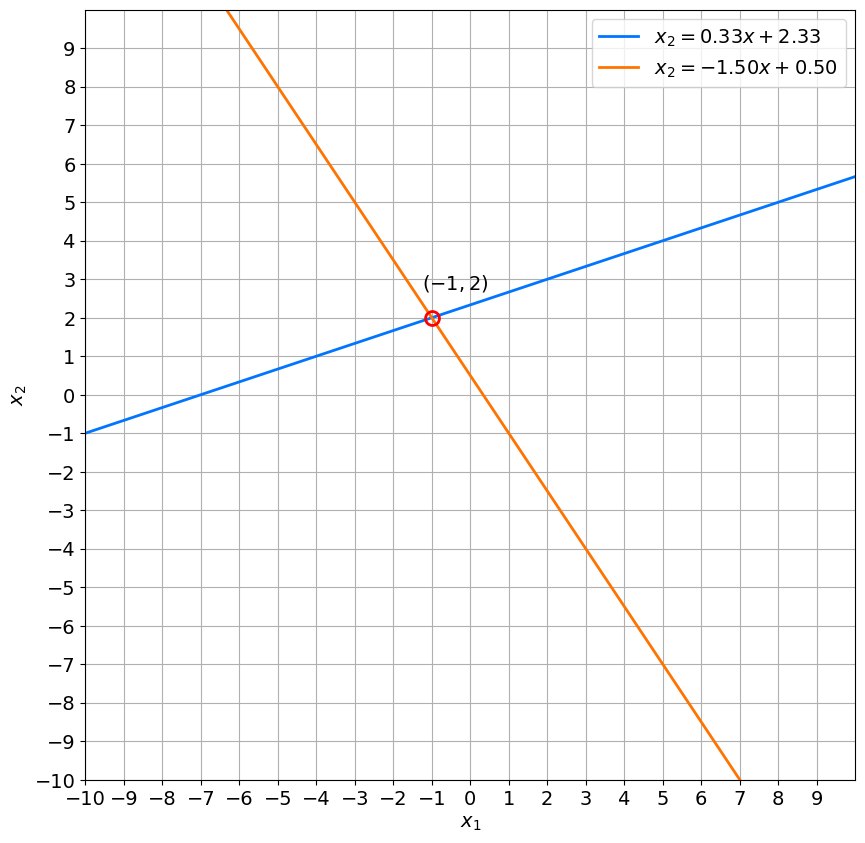

In [13]:
import matplotlib.pyplot as plt


def plot_lines(M):
    x_1 = np.linspace(-10, 10, 100)
    x_2_line_1 = (M[0, 2] - M[0, 0] * x_1) / M[0, 1]
    x_2_line_2 = (M[1, 2] - M[1, 0] * x_1) / M[1, 1]

    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
            label=f'$x_2={-M[0,0]/M[0,1]:.2f}x + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
            label=f'$x_2={-M[1,0]/M[1,1]:.2f}x + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1:].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A, b)
        ax.plot(solution[0], solution[1], 'o-', mfc='none',
                markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0] - 0.25, solution[1] + 0.75,
                f'$({solution[0]:.0f},{solution[1]:.0f})$', fontsize=14)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

plot_lines(A_system)

## 3. - System of linear equations with no solutions

Given another system of linear equations:
$$
\begin{cases}
-x_1 + 3x_2 = 7, \\
3x_1 - 9x_2 = 1,
\end{cases}
$$
Let's find the determinant of the corresponding matrix.



In [9]:
A_2 = np.array([[-1, 3], [3, -9]], dtype=float)
b_2 = np.array([7, 1], dtype=float)
d_2 = np.linalg.det(A_2)
print(f"Determinant of matrix A_2: {d_2:.2f}")

Determinant of matrix A_2: -0.00


It is equal to zero, thus the system cannot have one unique solution.
It will have either infinitely many solutions or none. The consistency of it will depend on the free coefficients (right side coefficients).


In [10]:
try:
    x_2 = np.linalg.solve(A_2, b_2)
    print(x_2)
except np.linalg.LinAlgError as err:
    print(err)

[1.32105589e+17 4.40351964e+16]


Prepare to apply the elimination method, constructing the matrix, corresponding to this linear system.

In [11]:
A_2_system = np.hstack((A_2, b_2.reshape(2, 1)))
print(A_2_system)

[[-1.  3.  7.]
 [ 3. -9.  1.]]


Perform elimination:


In [12]:
A_2_system_res = A_2_system.copy()
A_2_system_res[1] = A_2_system_res[0] * 3 + A_2_system_res[1]
print(A_2_system_res)

[[-1.  3.  7.]
 [ 0.  0. 22.]]


The last row will correspond to the equation 0 = 22 which has no solution.
Thus, the whole linear has no solutions. Let's see what will be on the graph.

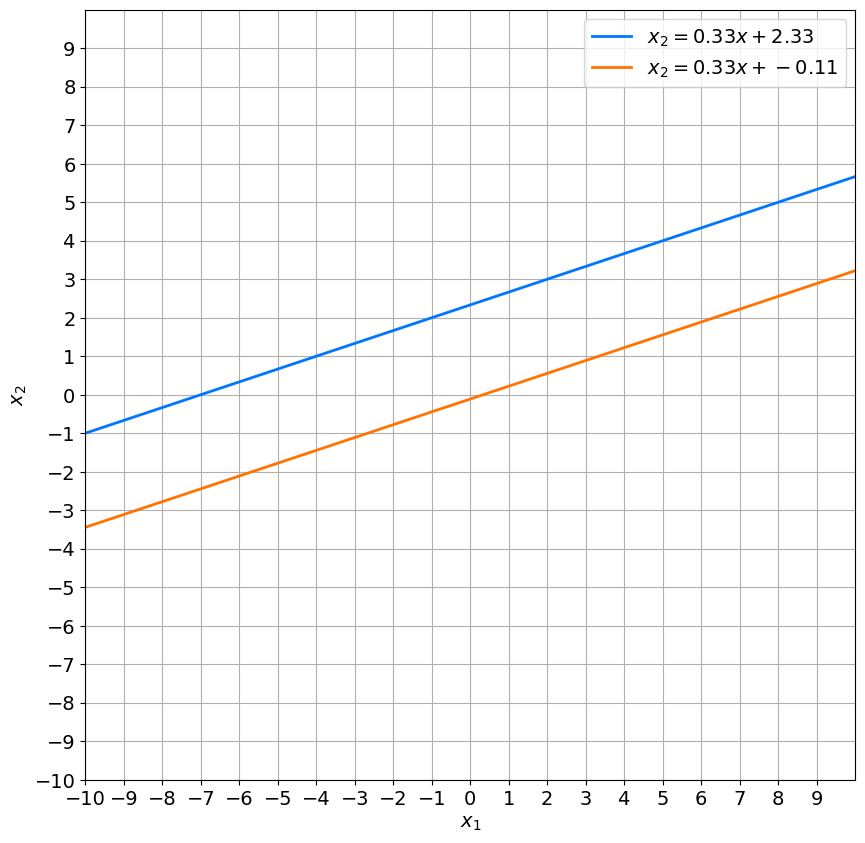

In [14]:
plot_lines(A_2_system)

## 4. - System of linear equations with infinite number of solutions
Changing free coefficients of the system you can bring it to consistency:
$$
\begin{cases}
-x_1 + 3x_2 = 7 \\
3x_1 - 9x_2 = -21
\end{cases}
$$



In [16]:
b_3 = np.array([7, -21], dtype=float)

Prepare the new matrix, corresponding to the system:


In [17]:
A_3_system = np.hstack((A_2, b_3.reshape((2, 1))))
print(A_3_system)

[[ -1.   3.   7.]
 [  3.  -9. -21.]]


Perform elimination using elementary operations:


In [18]:
A_3_system_res = A_3_system.copy()

A_3_system_res[1] = A_3_system_res[0] * 3 + A_3_system_res[1]
print(A_3_system_res)

[[-1.  3.  7.]
 [ 0.  0.  0.]]


From the corresponding linear system:

$$
\begin{cases}
-x_1 + 3x_2 = 7 \\
0 = 0
\end{cases}
$$

the solutions of the linear system are:

$$
x_1 = 3x_2 - 7, \quad \text{where } x_2 \in \mathbb{R}.
$$


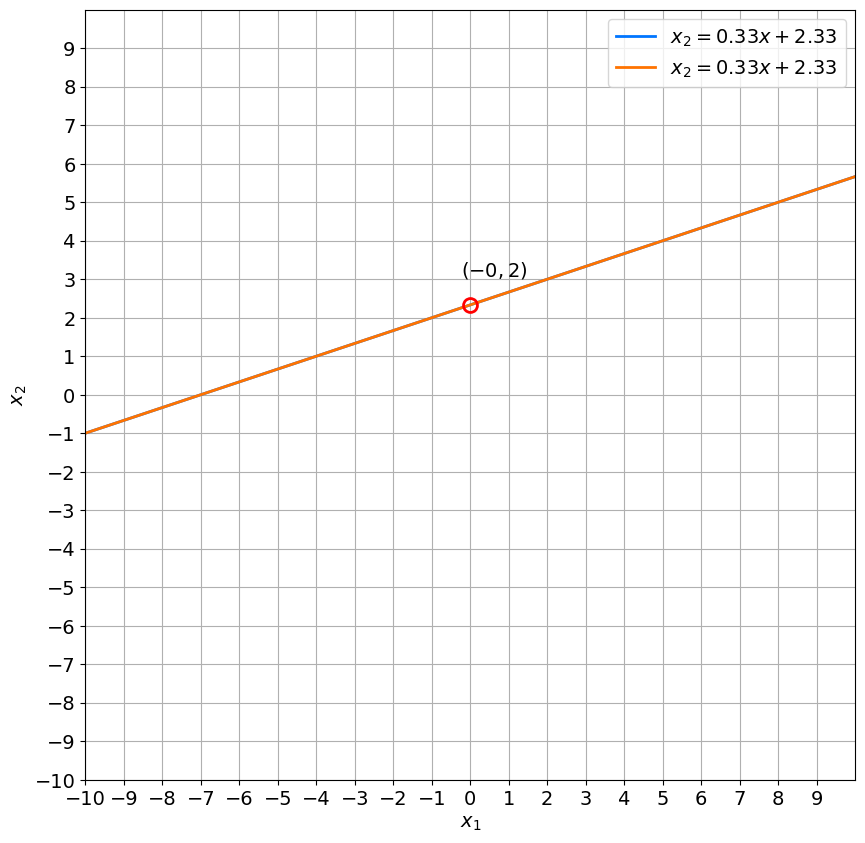

In [19]:
plot_lines(A_3_system)